In [1]:
from fastai.vision.all import *
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train_path = 'data/train/train/'
test_path = 'data/test/test/images/'
csv_path =  train_path + '/train.csv'
df = pd.read_csv(csv_path)
df.head()

,image_id,filename,label
0,1,1.jpg,2
1,2,2.jpg,4
2,3,3.jpg,2
3,4,4.jpg,3
4,5,5.jpg,5


In [3]:
label_mapping = {
    1: "crack",
    2: "scratch",
    3: "tire flat",
    4: "dent",
    5: "glass shatter",
    6: "lamp broken"
}

df['label'] = df['label'].map(label_mapping) 

In [4]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader('filename', pref=train_path + '/images/'), 
    get_y=ColReader('label'), 
    batch_tfms=aug_transforms(mult=0.1),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=[Resize(192, method='squish')]
).dataloaders(df, bs=32)
dls = dls

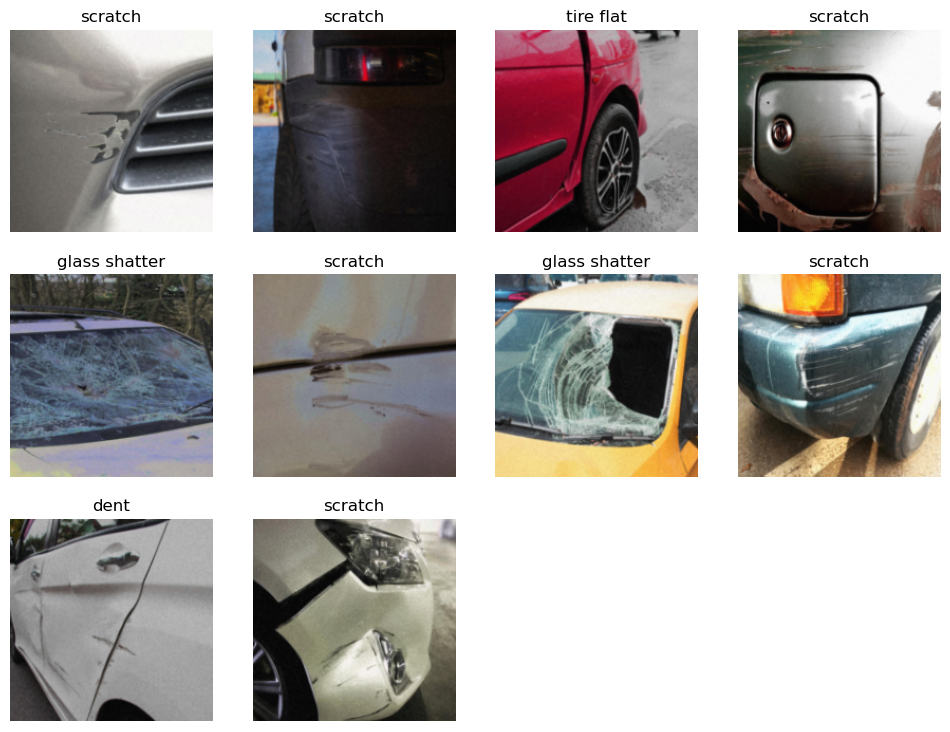

In [5]:
dls.show_batch(max_n=10)

In [6]:
import torch
print("GPU Available:", torch.cuda.is_available())  # Should return True
print("GPU Count:", torch.cuda.device_count())  # Number of GPUs available
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))  # Name of the GPU
    print("CUDA Version:", torch.version.cuda)  # CUDA version

GPU Available: True
GPU Count: 1
GPU Name: NVIDIA GeForce GTX 1650
CUDA Version: 11.8


In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.dls.to('cuda')  # Move dataloaders to GPU
learn.model.to('cuda')  # Move model to GPU
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.323536,0.817746,0.273611,02:39


epoch,train_loss,valid_loss,error_rate,time
0,0.707718,0.462971,0.159028,02:44
1,0.319349,0.214506,0.075694,02:47
2,0.166998,0.181616,0.060417,02:46


In [18]:
torch.cuda.empty_cache()

In [19]:
test_path = Path('data/test/test/images/')
image_files = list(test_path.glob("*.jpg")) + list(test_path.glob("*.png"))  # Add more extensions if needed


In [20]:
test_images = []

In [21]:
test_images = []
resize_tfms = Resize(192, method='squish')

for i in range(10):
    img = PILImage.create(image_files[i])  # Load image
    resized_img = resize_tfms(img)  # Apply transformation
    test_images.append(resized_img)  # 

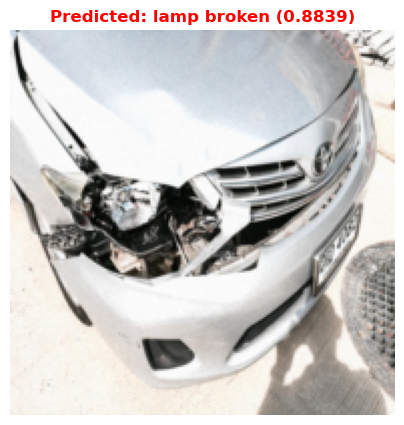

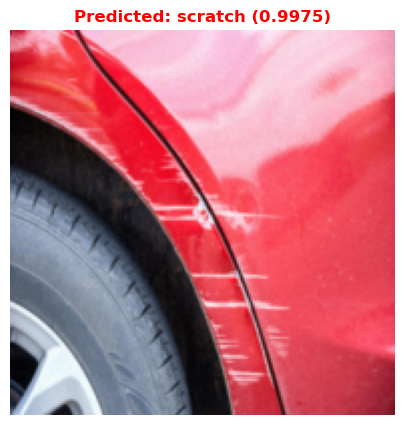

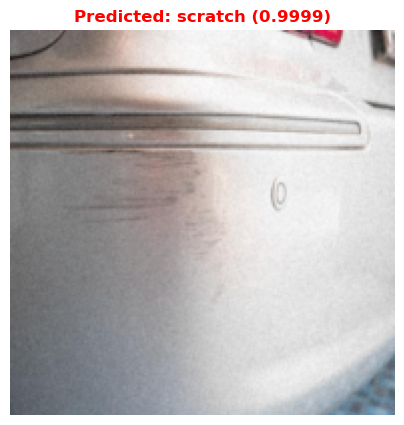

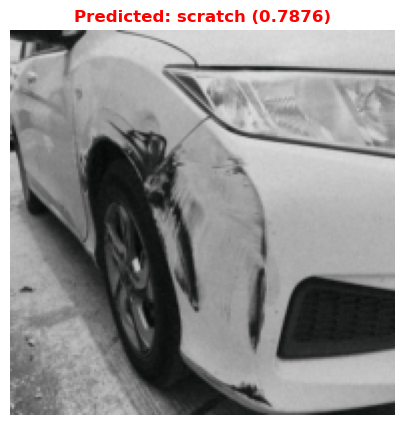

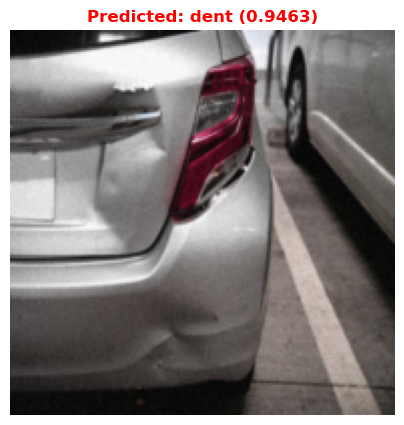

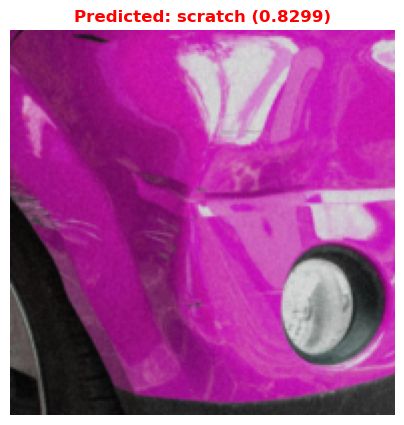

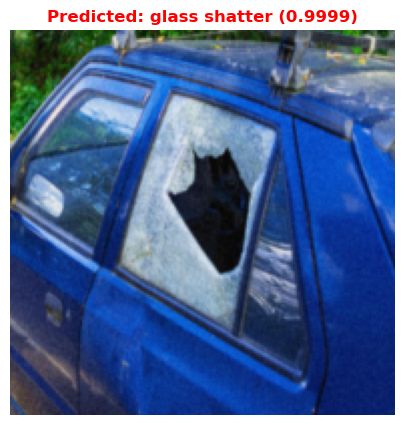

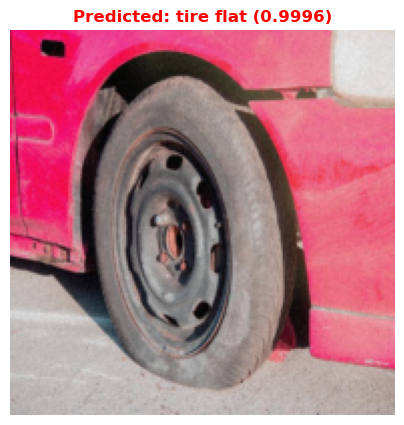

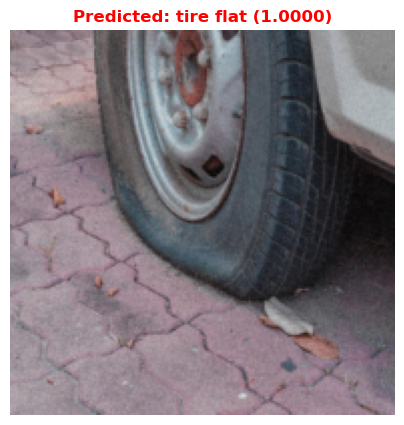

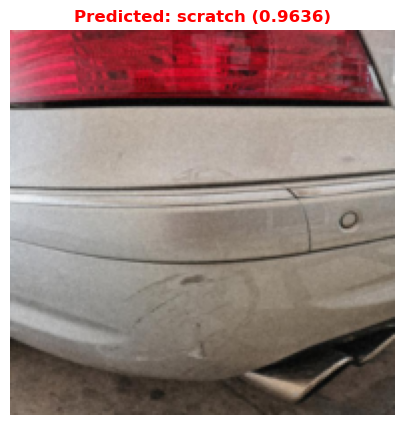

In [22]:
for img_path in test_images:
    img = PILImage.create(img_path)  # Load image
    img_resized = resize_tfms(img)   # Resize image
    is_what, _, probs = learn.predict(img_resized)  # Make prediction

    # Plot image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(img_resized)
    plt.axis("off")  # Hide axes
    plt.title(f"Predicted: {is_what} ({probs.max():.4f})", fontsize=12, color='red', fontweight='bold')
    plt.show()

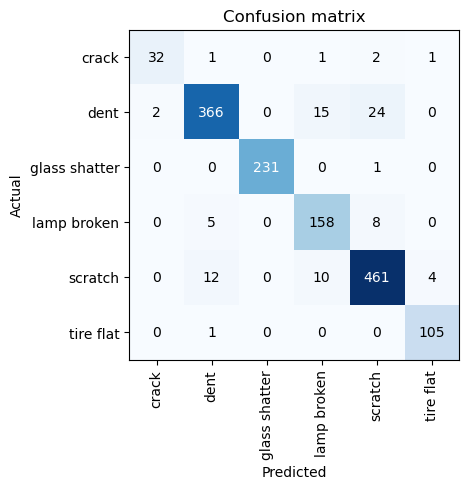

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

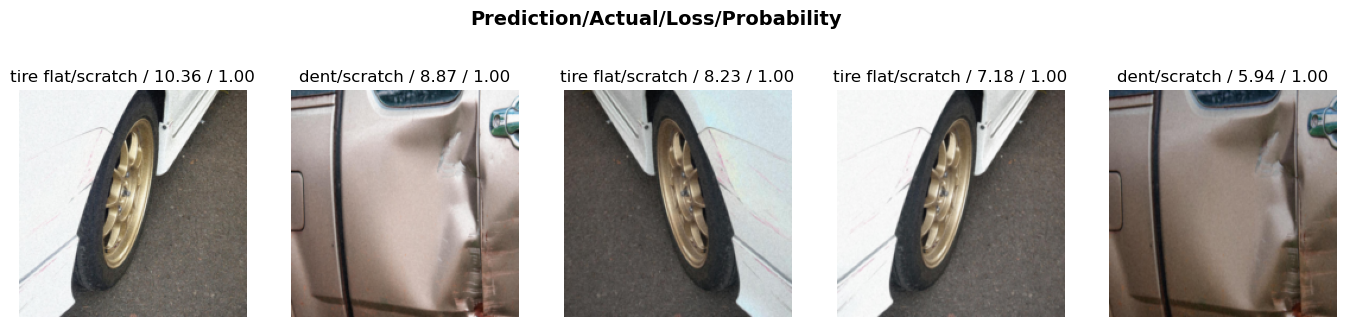

In [24]:
interp.plot_top_losses(5, nrows = 1, figsize = (17, 4))

In [15]:
!pip install voila fastai --upgrade


In [25]:
from fastai.vision.widgets import ImageClassifierCleaner

cleaner = ImageClassifierCleaner(learn)
cleaner

In [26]:
torch.cuda.empty_cache()  # Clears unused memory (does not free everything)

In [27]:
learn.export('model.pkl')